In [105]:
import os
import sys

In [114]:
def check_environment():
    if NotebookPythonModule.is_exist('google.colab'):
        return 'colab'
    else:
        return 'local'

def import_all(env='local'):
    if env == 'colab':
        from google.colab import drive
        drive.mount('/content/gdrive')
    
    exit_flag = False
    while not exit_flag:
        try:

            import pymorphy2
            import numpy as np
            import pandas as pd
            import seaborn as sns

            import requests

            from sklearn.model_selection import train_test_split
            from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
            from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

            from tqdm import tqdm
            tqdm.pandas()

            import matplotlib.pyplot as plt
            
            exit_flag = True
        except ModuleNotFoundError as e:
            module = e.name
            !pip install -U {module}
            os.system(f'pip install -U {module}')
    del exit_flag
    return locals()

# def update_globals(func):
#     @wr
#     globals().update(import_all())    
import_all()

{'plt': <module 'matplotlib.pyplot' from '/home/david/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 'tqdm': tqdm._tqdm.tqdm,
 'classification_report': <function sklearn.metrics.classification.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)>,
 'recall_score': <function sklearn.metrics.classification.recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>,
 'precision_score': <function sklearn.metrics.classification.precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>,
 'f1_score': <function sklearn.metrics.classification.f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)>,
 'accuracy_score': <function sklearn.metrics.classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>,
 'TfidfVectorizer': sklearn.feature_extraction.text.TfidfVectorizer,
 'CountVectorizer': sklearn.feature_e

In [120]:
os.system(f'pip install -U {"gfdgdfdgfdg"}')

AttributeError: 'int' object has no attribute 'frombytes'

In [ ]:
import sys

def call_function_get_frame(func, *args, **kwargs):
    """
    Calls the function *func* with the specified arguments and keyword
    arguments and snatches its local frame before it actually executes.
    """

    frame = None
    trace = sys.gettrace()
    def snatch_locals(_frame, name, arg):
        nonlocal frame
        if frame is None and name == 'call':
            frame = _frame
            sys.settrace(trace)
        return trace
    sys.settrace(snatch_locals)
    try:
        result = func(*args, **kwargs)
    finally:
        sys.settrace(trace)
    return frame, result

call_function_get_frame(import_all, 'local')[0].f_locals

In [100]:


funcs = [
    check_environment,
    import_all
]

def pipeline():
    pass

reduce(lambda data, f: f(data) if data is not None else f(), funcs, None).locals()

No module named 'google.colab'


AttributeError: 'dict' object has no attribute 'locals'

In [ ]:
morph = pymorphy2.MorphAnalyzer()


def save_csv(df, filename):
  path = os.path.join(DATA_PATH, f'{filename}.csv')
  df.to_csv(path)
  
def read_csv(filename, sep=','):
  path = os.path.join(DATA_PATH, f'{filename}.csv')
  df = pd.read_csv(path, sep=sep)
  return df


def load_datasets_merged():
  df_imp = pd.read_csv(f'{DATA_PATH}/merged_imp.csv')
  df_exp = pd.read_csv(f'{DATA_PATH}/merged_exp.csv')
  return {
      'implicit': df_imp,
      'explicit': df_exp
  }


def load_datasets_keywords():
  df_hotline = pd.read_csv(f'{DATA_PATH}/gkiev_hotline.ua.csv', sep=';')
  df_prom = pd.read_csv(f'{DATA_PATH}/gkiev_prom.ua.csv', sep=';')
  df_rozetka = pd.read_csv(f'{DATA_PATH}/gkiev_rozetka.com.ua.csv', sep=';')
  
  return {
      'hotline': df_hotline,
      'prom': df_prom,
      'rozetka': df_rozetka
  }


def get_sample_from_df(df, sample_size=0.1, random_state=40):
  num_rows = df.shape[0]
  return df.sample(int(num_rows * sample_size), random_state=random_state).copy()

In [ ]:
def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

  
# accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
from russian_tagsets import converters

to_ud = converters.converter('opencorpora-int', 'ud14')

def convert_from_opencorpora_tag(tag, text):
    ud_tag = to_ud(str(tag), text)
    pos = ud_tag.split()[0]
    gram = ud_tag.split()[1]
    return pos, gram
  
def process_word(word):
  tag = morph.parse(word)[0].tag
  pos, gram = convert_from_opencorpora_tag(tag, word)
  
  if pos == 'X':
    return tag._POS
  
  return f'{pos}#{gram}'


def process_seq(text):
  seq = text.split()
  processed = [process_word(word) for word in seq]
  return ' '.join(processed)

In [10]:
df = read_csv('hotline_tagged').iloc[:, 1:]
df.head()

,Ключевое слово,Результатов в Google,Слов,Символов,Частотность Весь мир,"""!Частотность !Весь !мир""",Позиция в выдаче Google,tags_
0,iphone x,2700000000,2,8,560863,290459,1,LATN LATN
1,купить iphone x,780000000,3,15,37808,26488,1,VERB#Aspect=Perf|VerbForm=Inf LATN LATN
2,айфон 5,16300000,2,7,807175,31316,1,NOUN#Animacy=Inan|Case=Nom|Gender=Masc|Number=...
3,samsung galaxy note 8,433000000,4,21,77337,36433,1,LATN LATN LATN NUM#NumForm=Digit
4,huawei p10,71500000,2,10,133083,30297,1,LATN LATN


In [43]:
# df['frequency'] = df.iloc[:, 3] / df.iloc[:, 2]
# df['char_word'] = df['Символов'] / df['Слов']
df['tags_'].map(lambda s: ' '.join([item for item in s.split('#') if '=' not in item]))

0                          LATN LATN
1                               VERB
2                               NOUN
3                 LATN LATN LATN NUM
4                          LATN LATN
5                                NUM
6                          LATN LATN
7                          LATN LATN
8                           LATN NUM
9                          LATN LATN
10                          LATN NUM
11                         LATN LATN
12                         LATN LATN
13                    LATN LATN VERB
14                         LATN LATN
15                    LATN LATN LATN
16                              NOUN
17                     LATN LATN NUM
18                              NOUN
19                               ADJ
20                     LATN LATN NUM
21                          LATN NUM
22                          LATN NUM
23                         LATN LATN
24                         LATN LATN
25                              VERB
26                LATN LATN LATN NUM
2

In [ ]:
df = df.drop(['Частотность Весь мир', '"!Частотность !Весь !мир"', 'Позиция в выдаче Google'], axis=1)

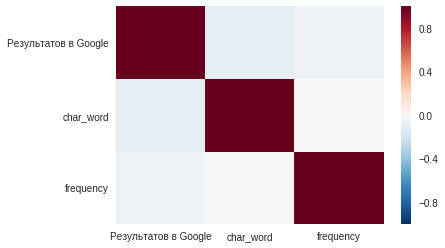

In [40]:
sns.heatmap(df[['Результатов в Google', 'char_word', 'frequency']].corr())

In [ ]:
def create_analyser_for_group(df,):

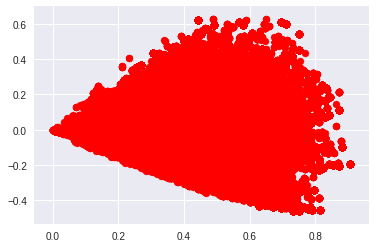

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(ngram_range=(2, 3), min_df=1)
tags_vec = vectorizer.fit_transform(test_df['pos_gram'])
svd = TruncatedSVD(n_components=2, random_state=0)
tr = svd.fit_transform(tags_vec)
plt.scatter(tr[:, 0], tr[:, 1], c='r', cmap='spring')

In [ ]:
km = KMeans(n_clusters=50, n_init=1, verbose=1, random_state=40)
clustered = km.fit(tr)

In [ ]:
terms = vectorizer.get_feature_names()
ordered_clusters = km.cluster_centers_.argsort()[:, ::-1][0]

In [ ]:
Counter()

In [147]:
Counter(test_df['pos_gram'][clustered.labels_ == 6])

Counter({'ADJ#Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing ADJ#Case=Nom|Number=Plur NOUN#Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing': 1,
         'ADJ#Case=Gen|Gender=Fem|Number=Sing NOUN#Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing VERB#Aspect=Perf|VerbForm=Inf': 2,
         'ADJ#Case=Nom|Gender=Fem|Number=Sing ADJ#Case=Nom|Gender=Fem|Number=Sing ADV#_': 2,
         'ADJ#Case=Nom|Gender=Fem|Number=Sing ADJ#Case=Nom|Gender=Fem|Number=Sing LATN': 1,
         'ADJ#Case=Nom|Gender=Fem|Number=Sing ADJ#Case=Nom|Gender=Fem|Number=Sing NOUN#Animacy=Anim|Case=Acc|Gender=Fem|Number=Sing': 3,
         'ADJ#Case=Nom|Gender=Fem|Number=Sing NOUN#Animacy=Anim|Case=Acc|Gender=Fem|Number=Sing ADJ#Case=Nom|Gender=Fem|Number=Sing': 1,
         'ADJ#Case=Nom|Gender=Fem|Number=Sing NOUN#Animacy=Anim|Case=Acc|Gender=Fem|Number=Sing NOUN#Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing': 1,
         'ADJ#Case=Nom|Gender=Fem|Number=Sing NOUN#Animacy=Anim|Case=Nom|Gender=Fem|Number=Sing PROPN#Animacy=Inan|Case

In [132]:
from collections import Counter

Counter(clustered.labels_)

Counter({0: 17347,
         1: 2327,
         2: 21466,
         3: 4766,
         4: 8746,
         5: 8036,
         6: 18416,
         7: 7215,
         8: 5768,
         9: 3710,
         10: 4015,
         11: 11995,
         12: 369,
         13: 4140,
         14: 635,
         15: 2375,
         16: 4321,
         17: 309,
         18: 2758,
         19: 943})

In [ ]:
new_tags = tags = df_work[df_work['tags_count'] == 2]['tags'].tolist()

In [80]:
km.predict(vectorizer.transform(new_tags))

array([ 7,  7, 19, ...,  7,  7, 14], dtype=int32)

In [120]:

# tr1 = svd.
tr[:, 0]

array([0.71091878, 0.31019713, 0.72117169, ..., 0.50496367, 0.33007132,
       0.09486541])

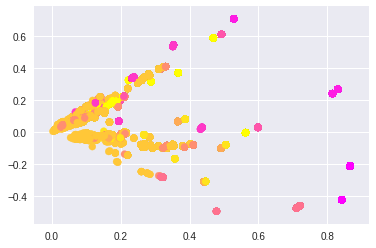

In [121]:
# plt.scatter(tr[:, 0], tr[:, 1], c=km.labels_, cmap='spring')
plt.scatter(tr[:, 0], tr[:, 1], c=km.labels_, cmap='spring')

In [83]:
rozetka_tag_list = [file for file in os.listdir(DATA_PATH) if 'rozetka-tag' in file]
len(rozetka_tag_list)

1000

In [ ]:
# for file in hotline_tag_list:
#   os.remove(os.path.join(DATA_PATH, file))

In [ ]:
df = pd.DataFrame()

In [ ]:
with open(os.path.join(DATA_PATH, rozetka_tag_list[0])) as f:
  df['rozetka_tags'] = f.readlines()

In [87]:
df_rozetka = kw_datasets['rozetka']
df_rozetka.head(2)

,Ключевое слово,Результатов в Google,Слов,Символов,Частотность Весь мир,"""!Частотность !Весь !мир""",Позиция в выдаче Google
0,розетка,70,1,7,1143918,131152,1
1,квадрокоптер,2570000,1,12,363913,26924,1


In [86]:
df

,rozetka_tags
0,VERB#Aspect=Perf|VerbForm=Inf NOUN#Animacy=Ina...
1,VERB#Aspect=Perf|VerbForm=Inf NOUN#Animacy=Ina...
2,VERB#Aspect=Perf|VerbForm=Inf ADJ#Case=Nom|Num...
3,LATN NOUN#Animacy=Inan|Case=Nom|Gender=Masc|Nu...
4,VERB#Aspect=Perf|VerbForm=Inf ADJ#Case=Nom|Num...
5,LATN LATN LATN\n
6,VERB#Aspect=Perf|VerbForm=Inf ADJ#Case=Nom|Num...
7,ADJ#Case=Nom|Gender=Masc|Number=Sing NOUN#Anim...
8,LATN LATN\n
9,ADV#_ LATN\n


In [ ]:
df['rozetka_tags'] = df['rozetka_tags'].str.strip()

In [89]:
for tag_list in tqdm(rozetka_tag_list[1:]):
  with open(os.path.join(DATA_PATH, tag_list)) as f:
    df_temp = pd.DataFrame()
    df_temp['rozetka_tags'] = [tag.strip() for tag in f.readlines()]
    df = pd.concat([df, df_temp], ignore_index=True)


100%|██████████| 999/999 [01:09<00:00,  7.21it/s]


In [94]:
df.shape[0]
df.iloc[0, 0]

'VERB#Aspect=Perf|VerbForm=Inf NOUN#Animacy=Inan|Case=Nom|Number=Ptan ADJ#Case=Nom|Number=Plur ADJ#Case=Nom|Number=Plur'

In [ ]:
kw_datasets = load_datasets_keywords()

In [ ]:
kw_rozetka = kw_datasets['rozetka']

In [98]:
kw_rozetka

,Ключевое слово,Результатов в Google,Слов,Символов,Частотность Весь мир,"""!Частотность !Весь !мир""",Позиция в выдаче Google,tags_
0,розетка,70,1,7,1143918,131152,1,VERB#Aspect=Perf|VerbForm=Inf NOUN#Animacy=Ina...
1,квадрокоптер,2570000,1,12,363913,26924,1,VERB#Aspect=Perf|VerbForm=Inf NOUN#Animacy=Ina...
2,розетка интернет магазин,12300000,3,24,50229,34257,1,VERB#Aspect=Perf|VerbForm=Inf ADJ#Case=Nom|Num...
3,ноутбук,33700000,1,7,5348375,37479,1,LATN NOUN#Animacy=Inan|Case=Nom|Gender=Masc|Nu...
4,лего сити,95,2,9,160773,32356,1,VERB#Aspect=Perf|VerbForm=Inf ADJ#Case=Nom|Num...
5,игрушки,164000000,1,7,4842921,35795,1,LATN LATN LATN
6,купить ноутбук,22700000,2,14,473461,32030,1,VERB#Aspect=Perf|VerbForm=Inf ADJ#Case=Nom|Num...
7,гироскутер,96,1,10,651367,89955,1,ADJ#Case=Nom|Gender=Masc|Number=Sing NOUN#Anim...
8,гироскутер купить,1940000,2,17,143976,36821,1,LATN LATN
9,xiaomi redmi note 4x,27400000,4,20,232937,45549,1,ADV#_ LATN


In [54]:
kw_rozetka.to_csv(os.path.join())

,Ключевое слово,Результатов в Google,Слов,Символов,Частотность Весь мир,"""!Частотность !Весь !мир""",Позиция в выдаче Google,tags_
0,iphone x,2700000000,2,8,560863,290459,1,LATN LATN
1,купить iphone x,780000000,3,15,37808,26488,1,VERB#Aspect=Perf|VerbForm=Inf LATN LATN
2,айфон 5,16300000,2,7,807175,31316,1,NOUN#Animacy=Inan|Case=Nom|Gender=Masc|Number=...
3,samsung galaxy note 8,433000000,4,21,77337,36433,1,LATN LATN LATN NUM#NumForm=Digit
4,huawei p10,71500000,2,10,133083,30297,1,LATN LATN
5,7 айфон цена,10300000,3,12,201382,34792,1,NUM#NumForm=Digit NOUN#Animacy=Inan|Case=Nom|G...
6,lg g6,102000000,2,5,72942,27206,1,LATN LATN
7,xiaomi mi5,13200000,2,10,164018,39452,1,LATN LATN
8,iphone 7 plus,1720000000,3,13,197152,35551,1,LATN NUM#NumForm=Digit LATN
9,mi6 xiaomi,8640000,2,10,104121,38770,1,LATN LATN


In [ ]:
save_csv(kw_hotline, 'hotline_tagged')

In [72]:
hotline_tagged = read_csv('hotline_tagged')
hotline_tagged.head()

,Unnamed: 0,Ключевое слово,Результатов в Google,Слов,Символов,Частотность Весь мир,"""!Частотность !Весь !мир""",Позиция в выдаче Google,tags_
0,0,iphone x,2700000000,2,8,560863,290459,1,LATN LATN
1,1,купить iphone x,780000000,3,15,37808,26488,1,VERB#Aspect=Perf|VerbForm=Inf LATN LATN
2,2,айфон 5,16300000,2,7,807175,31316,1,NOUN#Animacy=Inan|Case=Nom|Gender=Masc|Number=...
3,3,samsung galaxy note 8,433000000,4,21,77337,36433,1,LATN LATN LATN NUM#NumForm=Digit
4,4,huawei p10,71500000,2,10,133083,30297,1,LATN LATN
